# Project: Watts-Strogatz Graphs

For: COMP 215 Spring 2024  
By: Stephen Bowman  

The following experiment will showcase Watts-Strogatz graphs in modelling Small World graphs and take the reader through the proof seen in Think Complexity by Allen Downey.  

This experiment will use code and information from Chapter 5 of Allen Downey's book Think Complexity, 2nd Edition.

## Background 

In the paper "Collective dynamics of ‘small-world’ networks" Duncan Watts and Steven Strogatz proposed a generative model, or model "that tries to explain a phenomenon by modeling the process that builds or leads to the phenomenon", to help explain small world graphs in the context of social networks. The model starts with a regular graph with n nodes each connected to k neighbors. Then, the graph can be rewired with random edges with a parameter, p, that controls the randomness of the graph and if an edge will be rewired. If p = 0 the graph is regular, when p = 1 the graph is completely random. This will become important later on.


## The Small World Experiment and Path Length

Before explaining Watts and Stogatz's experiment it will be beneficial to define what is a small world graph. The American social psychologist Stanley Milgram proposed the theory of small world graphs from his own experiment to study the structure of social networks. As described by Allen Downey,  

"In the Small World Experiment, Milgram sent a package to several randomly-chosen people in Wichita, Kansas, with instructions asking them to forward an enclosed letter to a target person, identified by name and occupation, in Sharon, Massachusetts. The subjects were told that they could mail the letter directly to the target person only if they knew him personally; otherwise they were instructed to send it, and the same instructions, to a relative or friend they thought would be more likely to know the target person.

Many of the letters were never delivered, but for the ones that were the average path length — the number of times the letters were forwarded — was about six. This result was taken to confirm previous observations (and speculations) that the typical distance between any two people in a social network is about “six degrees of separation”.

For many this might sound surprising, one might associate who they know with distance, whether they live in the same province, city, block of town, and the likelihood that they know those people would decrease in relation. But that average of six degrees had letters travelling to other cities, not just within the starting town, going against the idea that social networks were localized and making path lengths not proportional to geogrphical distance. This leads us into clustering.

## Clustering

From Allen Downey,

"Clustering is a measure of the “cliquishness” of the graph. In a graph, a clique is a subset of nodes that are all connected to each other; in a social network, a clique is a set of people who are all friends with each other. Watts and Strogatz defined a clustering coefficient that quantifies the likelihood that two nodes that are connected to the same node are also connected to each other."

While the measure is useful it's not useful in and of itself as regular graphs are shown to have high clustering and high path length, with random graphs the opposite. This initial fact is what lead to Watts and Stogatz's creating the generative model described at the start.

## Ring Lattice Graph

For their experiment Watts and Stogatz's chose the regular graph called a ring lattice (shown later on). A regular graph has every node attached to everyother node, with the number of neighbors being called the degree of the node.  

First, we import the required python libraries for performing the experiment.

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate

np.random.seed(17)

ModuleNotFoundError: No module named 'utils'

For any graph we will need a list of nodes and edges. Below is a generator function that, from Allen Downey, that takes a list of nodes and a number to specify how many edges to give each node.

In [100]:
def adjacent_edges(nodes, halfk):
    """Yields edges between each node and `halfk` neighbors.
    
    halfk: number of edges from each node
    """
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v

With the above function Allen Downey then crafts the function make_ring_lattice, generating a ring lattice graph by passing it n edges and degree k.

In [101]:
def make_ring_lattice(n, k):
    """Makes a ring lattice with `n` nodes and degree `k`.
    
    Note: this only works correctly if k is even.
    
    n: number of nodes
    k: degree of each node
    """
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

Now we can draw a ring lattice graph, in the below using 10 nodes with degree 4 (used by Downey in Think Complexity 2nd. Edition)

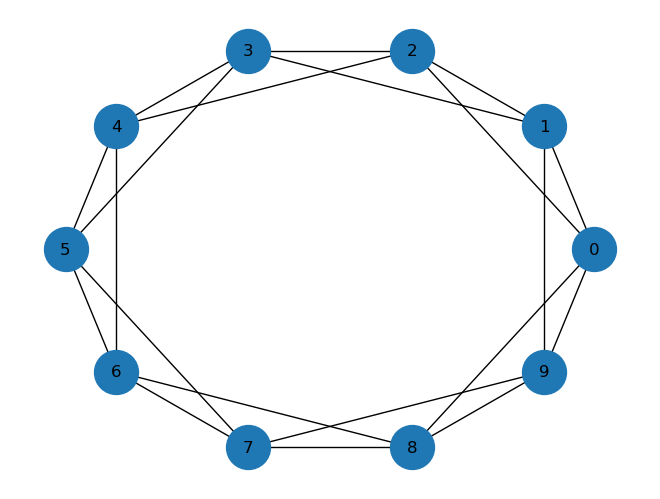

In [102]:
lattice = make_ring_lattice(10, 4)

nx.draw_circular(lattice, 
                 node_color='C0', 
                 node_size=1000, 
                 with_labels=True)

plt.show()

## Making a Watts-Strogatz (WS) Graphs

Now that we can generate a ring lattice graph we can start to test "rewiring" the edges. For this we will need some more helper functions. In the experiment by Watts and Strogatz they "consider the edges in a particular order and rewire each one with probability p". From here if an edge is rewired we leave the first node and choose the second at random. Watts and Strogatz did not allow for self loops, an edge exiting and then entering the same node, and multiple edges, where two nodes could have more than one edge between them, for example. Those conditions keep it inline with the definition of a simple graph.

Below, Downey defines a set of functions to generate a Watts-Strogatz graph and rewire them.

In [103]:
def flip(p):
    """Returns True with probability `p`."""
    return np.random.random() < p

def rewire(G, p):
    """Rewires each edge with probability `p`.
    
    G: Graph
    p: float
    """
    nodes = set(G)
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)

def make_ws_graph(n, k, p):
    """Makes a Watts-Strogatz graph.
    
    n: number of nodes
    k: degree of each node
    p: probability of rewiring an edge
    """
    ws = make_ring_lattice(n, k)
    rewire(ws, p)
    return ws

First, a flip function takes the probability and uses the numpy random.random function to produce a number between 0 and 1, compare it to the probability, and return True when the random number is less than the given probability, False otherwise. He then defines a rewire function, using the flip function, to go to each edge and rewire it if the random choice comes back true, within the probability specified. The function make_ws_graph generates, as implied, a Watts-Strogatz graph with some number of nodes, degree for each node, and probability for rewiring the edge, using the previous two functions.

Of note, the above method does not consider the edges originally specified by Watts and Strogatz. Thankfully, this doesn't affect the result.

Below is the test done by Downey, where n and k are fixed, but p changes.

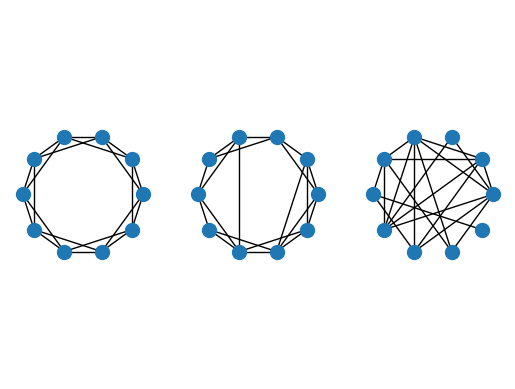

In [104]:
n = 10
k = 4
ns = 100

plt.subplot(1,3,1)
ws = make_ws_graph(n, k, 0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,2)
ws = make_ws_graph(n, k, 0.2)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.subplot(1,3,3)
ws = make_ws_graph(n, k, 1.0)
nx.draw_circular(ws, node_size=ns)
plt.axis('equal')

plt.show('figs/chap04-2')

We see that with a probability of 0, the graph is a regular ring lattice, while a probability of 1 gives us a completely random set of edges for the original nodes. The middle graph is for a probability of 0.2, or 20%.

## Compute the Clustering Coefficient

As mentioned at the begining, the clustering coefficient "quantifies the tendency for the nodes to form cliques", where a clique is defiend to be a set of nodes that are completely connected, every node is connected to every other node by some edge.

........



First we will need to a generator function to give us back all possible pairings for some set of nodes. Below is the function all_pairs provided by Downey.

In [105]:
def all_pairs(nodes):
    """Generates all pairs of nodes."""
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

Next, we need to calculate the local clustering coefficient, Cu, for every node before we can find the "network average clustering coefficient", C, or just the clustering coefficient for the graph. From graph theory, we know that for any node u with k neighbors, if all of the neighbors are connected to each other, then there would be k(k-1)/2 edges. The fraction of those that exist is the Cu for said node u.

The function below, from Downey, computes Cu for a given node u on some graph G. Take note of the return np.nan, which is a special value "Not a Number", for when the node has fewer than 2 neighbors. With less than 2 neighbors we would end up with a fractional number of edges, which is not possible for simpel graphs as defined for the experiment. Plus, it would make even less sense for a social network.|

In [106]:
def node_clustering(G, u):
    """Computes local clustering coefficient for `u`.
    
    G: Graph
    u: node
    
    returns: float
    """
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan
        
    possible = k * (k-1) / 2
    exist = 0    
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible


With the above function we can now find the clustering coefficient for the whole graph, or C. Below is the code supplied by Downey to do just that.

In [107]:
def clustering_coefficient(G):
    """Average of the local clustering coefficients.
    
    G: Graph
    
    returns: float
    """
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

Let's now use the example from Think Complexity by Downey to check the above code. We'll make a regular rign lattice with 10 nodes and degree 4 for each.

In [108]:
lattice = make_ring_lattice(10, 4)

The local clustering coefficient for a node from "lattice" should be 0.5, lets check that.

In [109]:
node_clustering(lattice, 1)

0.5

Perfect! We know that for a regular ring lattice graph the local clustering coefficient should equal the networks. Below confirms that fact and shows our functions work as intended.

In [110]:
clustering_coefficient(lattice)

0.5

While true for the above test case, for other Watts-Strogatz graphs the local and network clustering coefficients will differ from each other. But with the above function we now need to find the path lengths for the graph.

## Shortest Path Lengths to Characteristic Path Length

To find the characteristic path length, the "average length of the shortest path between each pair of nodes", we will have to find the path lengths for each node to every other node. NetworkX provides us a function to find the shortest path for every node, returning a dictionary keyed by target to the shortest path length from the source to that target, when only the source is provided (which we will do). The documentation for the function can be found at:
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html

The function from Downey takes a Graph as input and then returns a dictionary of the shortest path lengths.

In [111]:
def path_lengths(G):
    length_iter = nx.shortest_path_length(G)
    for source, dist_map in length_iter:
        for dest, dist in dist_map.items():
            yield dist

With path_lenghts, we can then make a function to compute the mean, or average, of the path lengths to find the characteristic path length.

In [112]:
def characteristic_path_length(G):
    return np.mean(list(path_lengths(G)))

Let's use the lattice graph from our clustering coefficient test and compute the characteristic path length for the graph.

In [113]:
characteristic_path_length(lattice)

1.5

That result fits the expectation for the ring lattice, we have 10 nodes, and when choosing another node to traverse to, gives us the combinatoric defintion of 10 choose 2, with some being 1 edge and other 2 for traversal.

What about for a simpler example, say the one given by Downey where he generates a ring lattice with 3 nodes with degree 2 for each. This is also the graph K3, or complete graph on 3 vertices/nodes.

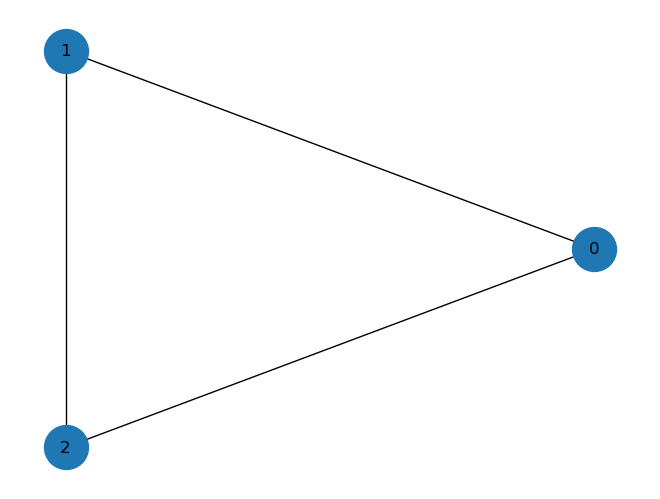

In [114]:
lattice_k3 = make_ring_lattice(3, 2)

nx.draw_circular(lattice_k3, 
                 node_color='C0', 
                 node_size=1000, 
                 with_labels=True)

plt.show()

In [115]:
list(path_lengths(lattice_k3))

[0, 1, 1, 0, 1, 1, 0, 1, 1]

In [116]:
characteristic_path_length(lattice_k3)

0.6666666666666666

From the above result we know our new functions work, now we can run the experiment done by Watts-Strogatz.

## The Wattz-Strogatz Experiment

Now that we have created the necessary functions/tools for replicating the experiment, "which shows that for a range of values of , a WS graph has high clustering like a regular graph and short path lengths like a random graph", we start by defining another function to generate a WS graph and compute its statistics, defined by Downey as run_one_graph.

In [117]:
def run_one_graph(n, k, p):
    """Makes a WS graph and computes its stats.
    
    n: number of nodes
    k: degree of each node
    p: probability of rewiring
    
    returns: tuple of (mean path length, clustering coefficient)
    """
    ws = make_ws_graph(n, k, p)    
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    # print(mpl, cc)
    return mpl, cc

Our next function will run the experiment, aptly named by Downey as run_experiment. As mention by Downey, Watts and Strogatz ran the experiment with 1000 nodes where each one had degree 10. This will take time to run, but those will only be the default values, you can pass any n and k value to run_experiment.

In [118]:
def run_experiment(ps, n=1000, k=10, iters=20):
    """Computes stats for WS graphs with a range of `p`.
    
    ps: sequence of `p` to try
    n: number of nodes
    k: degree of each node
    iters: number of times to run for each `p`
    
    returns:
    """
    res = []
    for p in ps:
        print(p)
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        print(means)
        res.append(means)
    return np.array(res)

Just some quick notes on the above function, to run the experiment for any p we need to provide a list of probabilites to try, ps in the above function. To generate a list of evenly space probabilities and a log scale we use the Numpy function logspace, but wait, why logspace you might ask? The simple answer is that the relation Watts and Strogatz were attempting to see is graphically easier to see using a log scale, but for now jsut keep that in your mind for now, it will be clearer once we graph the resulting data. 

Also, everytime the function loops through, it generates 20 random graphs for each p value. As run_one_graph return a pair of values, we then put those pairs into the list t. From there the list is converted into a Numpy array and computes the mean for each column of values to give an array of one row and two columns. The list returned after looping through the program gives us a row for each p value, with the first column being the characteristic path length, L, and the second being the network average clustering coefficient, or C.  

Below is the values for p we will use.

In [119]:
ps = np.logspace(-4, 0, 9)
ps

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00])

Now lets runs the experiment. As noted by Downey, this will take a while to compute, for easier use consider lowering the number of nodes for your own tests.

In [120]:
%time res = run_experiment(ps)

0.0001
[46.607598    0.66645826]
0.00031622776601683794
[38.6476562   0.66593563]
0.001
[27.4885419  0.6647125]
0.0031622776601683794
[15.7035599  0.6608606]
0.01
[8.7998703  0.64703295]
0.03162277660168379
[5.9804518  0.60776671]
0.1
[4.4251014  0.49007712]
0.31622776601683794
[3.5739129  0.21923448]
1.0
[3.2642172  0.00898933]
CPU times: total: 3min 36s
Wall time: 3min 37s


Now that we have the results we can pull the data apart and standardize the results using the first value for each respective metric, making them suitable to graph on the same axis. Numpy's transpose function breaks the array apart into two individual arrays.

In [121]:
L, C = np.transpose(res)

L /= L[0]
C /= C[0]

Now, we plot the data using the code provided by Downey.

NameError: name 'decorate' is not defined

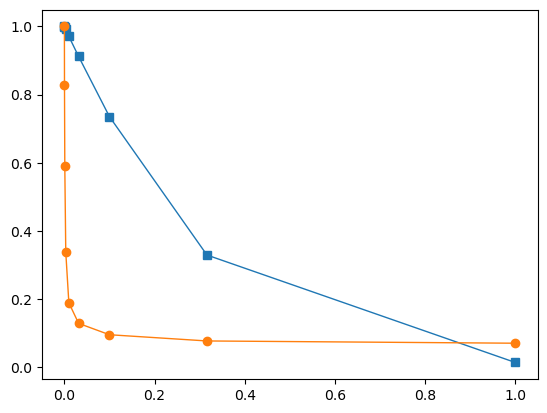

In [122]:
plt.plot(ps, C, 's-', linewidth=1, label='C(p) / C(0)')
plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])

plt.show('figs/chap04-3')

And now finally, with the above graph we the results for the Watts-Strogatz Experiment. Below is the summary by Downey, which I feel is the most concise way even I can think of puting it.

"As p increases, the mean path length drops quickly, because even a small number of randomly rewired edges provide shortcuts between regions of the graph that are far apart in the lattice. On the other hand, removing local links decreases the clustering coefficient much more slowly.
As a result, there is a wide range of p where a WS graph has the properties of a small world graph, high clustering and low path lengths.
And that’s why Watts and Strogatz propose WS graphs as a model for real-world networks that exhibit the small world phenomenon."

But you might still have the question of what that all means. What does this show us about real world netowrks? As connections are rewired, taking the graph away from an idealised state, the high clustering with a large range of p illustrates how like social networks in theory, the more connections we have the smaller the path length from one person to people outside their normal social clique. From the experiment we see that even a low probability will yield wide affecting changes in the path lengths for the whole network.

It should be noted that the Watts-Strogatz model do fall short of a true real-world network, but past and future research has been/is being done on the subject. If you are interested in why that is, because truly that could be a whole other notebook, I will refer you to the wikipedia page, linked below, for the Watts-Strogatz model as a good starting point.

https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model

## Run Your Own Test

I have left below for further exploration of the models and it's properties. The first code cell is for you to pick your values for number of nodes, degree for each, probability and them list of probabilities for the experiment. 

In [ ]:
n = 
k = 
p = 
ps = np.logspace(-4, 0, 9)

In [ ]:
ws = make_ws_graph(n, k, p)
nx.draw_circular(ws, 
                 node_color='C1', 
                 node_size=1000, 
                 with_labels=True)

In [ ]:
node_clustering(ws, 1), clustering_coefficient(lattice)

In [ ]:
characteristic_path_length(ws)

In [ ]:
%time experiment = run_experiment(ps, n=100, k=10, iters=10)

In [134]:
L, C = np.transpose(res)

L /= L[0]
C /= C[0]

In [ ]:
L

In [ ]:
C

In [ ]:
plt.plot(ps, C, 's-', linewidth=1, label='C(p) / C(0)')
plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')
decorate(xlabel='Rewiring probability (p)', xscale='log',
         title='Normalized clustering coefficient and path length',
         xlim=[0.00009, 1.1], ylim=[-0.01, 1.01])

plt.show('figs/chap04-3')